## Discrete Calculus in Python

Suppose we want to plot sin(x), where $x\space\epsilon\space[0,2\pi]$<br>
We define a set of x values, and associate these set of values to sin(x)<br>
we define $x_i = ih$, where $i = 0, 1,....,n$ and (step length) h = $2\pi/n$<br>
Now the associated values of the sin(x) will be,<br>
$S_i = sin(x_i)$, where $i = 0, 1,....,n$<br>

So we have a sequence of points, $(x_i, S_i)|_{i = 0}^{i=n}$<br>
n = mesh resolution, if we have high n, we have many points, and thus high resolution

In [41]:
import numpy as np
from matplotlib import pyplot as plt
import sys

In [42]:
#n = int(sys.argv[1])       #Command line arguments are those values that are passed during calling of program 
                           #along with the calling statement. Thus, the first element of the array sys.argv() 
                           #is the name of the program itself. sys.argv() is an array for command line arguments
                           #in Python. To employ this module named “sys” is used. sys.argv is similar to an 
                           #array and the values are also retrieved like Python array.

In [43]:
n = int(input("Enter the resolution: "))

Enter the resolution: 50


In [44]:
x = np.linspace(0, 2*np.pi, n+1)
s = np.sin(x)

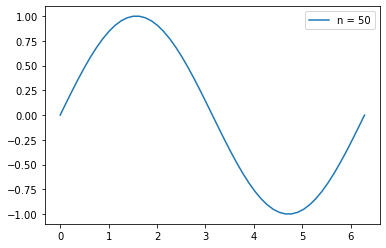

In [45]:
#Plotting

plt.plot(x,s, label = f"n = {n}")
plt.legend()
plt.show()

### Finding the values between the node(interpolation)

Assume, you have some $x \space \epsilon \space [x_k, x_{k+1}]$<br>
We have a linear function passing through $(x_k, s_k)\space -->\space (x_{k+1}, s_{k+1})$<br>

Linear approximation between the node$(x_k, x_{k+1})$ is given by:-
$s_j(x) = s_k + \frac{s_{k+1} - s_k}{x_{k+1} - x_k} (x - x_k)$ where $j\space \epsilon\space(k, k+1)$<br>

The above is a simple Linear approximation, which will work when the resolution is high

In [46]:
xp = eval(input())# the x from where we are starting are interpolation

3.69


In [47]:
n = int(input("Enter the resolution: "))

Enter the resolution: 25


In [48]:
def S_k(k):
    return s[k] + ((s[k+1] - s[k])/(x[k+1] - x[k]))*(xp - x[k])

In [49]:
h = 2*np.pi/n      #step size
x = np.linspace(0, 2*np.pi, n+1)
s = np.sin(x)
k = int(xp/h)      # will give the nearest index from the current set of data points to xp

print(f"Approximation of sin({xp}) = {S_k(k)}")
print(f"Exact Value of sin({xp}) = {np.sin(xp)}")
print(f"Error = {np.sin(xp) - S_k(k)}")

Approximation of sin(3.69) = -0.5179427051075658
Exact Value of sin(3.69) = -0.5213287903544065
Error = -0.0033860852468406977


In [50]:
len(x)

26

## Solving ODEs in Python

We are trying to solve equation of the type $\dot{x} = f(x(t), t)$ where $u(0) = u_0$

Examples:-<br>
$y^2\dot{y} = x,\space y(0) = y_0$


### Methods to solve differential Equation
#### 1.) Forward Euler

The idea is to approximate the derivative by one sided forward difference.
$$\dot{u(t_k)} = \frac{u(t_{k+1}) - u(t_k)}{\Delta{t}}$$<br>
$$f(u_k,t_k) = \frac{u_{k+1} - u_k}{\Delta{t}}$$<br>
$$u_{k+1} = u_k + f(u_k,t_k) \Delta{t}\tag{Forward Euler}$$<br>

So if we want to comput $u_1$, we need $u_0$, so that we can compute $u_1 = u_0 + \Delta{t}\space f(u_0, t_0)$<br>
thus, $u_{k+1} = u_k + \Delta{t}\space f(u_k, t_k)$<br>
and, $t_k = k \Delta{t}, \space k = 1,....,n$, where n is the resolution<br>
Input Required: $f, U_0, T(Stopping time)$, because we will stop at $T = n \Delta{t}$<br>
ouput: $U_1, U_1,...$ and time steps $t_1, t_2, ...$

In [51]:
def forward_euler(f, u0, T, step):
    """Solve u' = f(u,t), u(0) = u0, with n steps until T"""
    t = [0]
    u = [u0]
    i = 0
    while i <= T:
        u1 = u0 + f(u0, i) * step
        i += step
        u.append(u1)
        t.append(i)
        u0 = u1
    
    return u, t

Text(0, 0.5, '$e^x$')

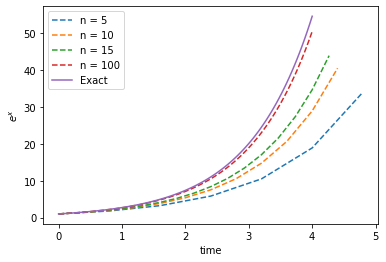

In [60]:
f = lambda u,t: u

for i in [5, 10, 15, 100]:
    u, t = forward_euler(f, u0 = 1, T = 4, step = 4/i)
    plt.plot(t, u, linestyle = "dashed", label = f"n = {i}")

#Plotting the exact curve
t_exact = np.linspace(0, 4, 100)
plt.plot(t_exact, np.exp(t_exact), label = "Exact")
plt.legend()
plt.xlabel("time")
plt.ylabel("$e^x$")

#### 2) Backward Euler
$$u_{k+1} = u_k + \Delta{t} f(u_{k+1}, t_{k+1})$$

This method requires more effort to solve for $u_{k+1}$ as it appears on both the sides of the equation.

In [131]:
from scipy.optimize import fsolve
def backward_euler(f, u0, T, n):
    """solve u' = f(u,t), u(0) = u0, with n steps untill T"""
    t = np.zeros(n+1)
    u = np.zeros(n+1)
    t[0] = 0
    u[0] = u0
    step = T/n
    for i in range(n):
        t[i+1] = t[i] + step
        G = lambda x: x - u[i] - (f(x, t[i+1]) * step)
        #print(G)
        u[i+1] = fsolve(G, 100)
        
    return u, t

Text(0, 0.5, '$e^x$')

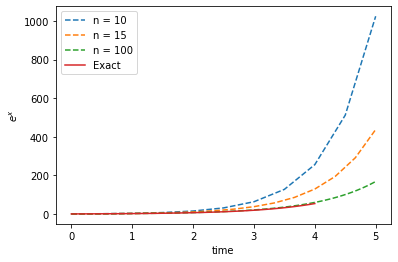

In [132]:
f = lambda u,t: u

for i in [10, 15, 100]:
    u_be, t = backward_euler(f, 1, 5, i)
    plt.plot(t, u_be, linestyle = "dashed", label = f"n = {i}")

#Plotting the exact curve
t_exact = np.linspace(0, 4, 100)
plt.plot(t_exact, np.exp(t_exact), label = "Exact")
plt.legend()
plt.xlabel("time")
plt.ylabel("$e^x$")

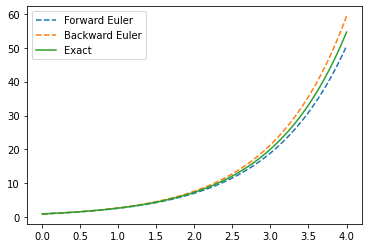

In [134]:
#Comparing Backward, forward and exactfor n = 100
u_fe, t_fe = forward_euler(f, u0 = 1, T = 4, step = 4/100)
u_be, t_be = backward_euler(f, 1, 4, 100)
plt.plot(t_fe, u_fe, linestyle="dashed", label="Forward Euler")
plt.plot(t_be, u_be, linestyle = "dashed", label = "Backward Euler")
plt.plot(t_fe, np.exp(t_fe), label = "Exact")
plt.legend()
plt.show()

In [100]:
f(5)

15

In [101]:
x

array([0.])